# 1.Data set discription and Question want to investigate
### Data set discription
VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.

### Questions
1.What factors influence passengers' survival rate?
2.What kind of plot could visualize the relationship between factors and survival rate


# 2. Load data and basic statistics

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:


df = pd.read_csv("data/train.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


Some columns includes several missing values.This will affect my analysis. I use .dropna() removes an observation from df if it has 1 NaN in any of its columns. 

In [4]:
df = df.drop(['Ticket','Cabin'], axis=1)
# Remove NaN values
df = df.dropna() 

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


# 3. Investigation and plotting

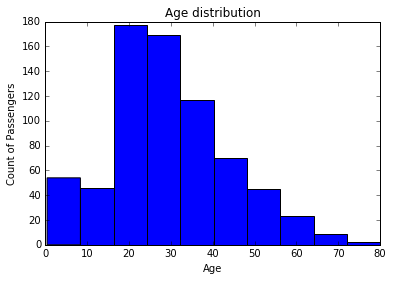

In [9]:
#distribution of Age and Fare
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(df['Age'], bins = 10, range = (df['Age'].min(),df['Age'].max()))
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Count of Passengers')
plt.show()

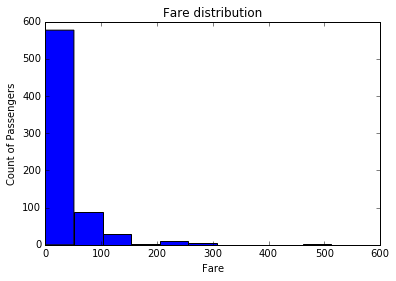

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(df['Fare'], bins = 10, range = (df['Fare'].min(),df['Fare'].max()))
plt.title('Fare distribution')
plt.xlabel('Fare')
plt.ylabel('Count of Passengers')
plt.show()

### How many people survived and the survival rate

0
1


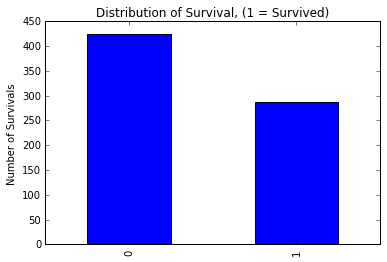

In [21]:
#df.Survived.value_counts().plot(kind='bar', alpha=alpha_bar_chart)  
# use a function

def survived_plot(x):
    return x.Survived.value_counts().plot(kind='bar')
survived_plot(df)
alpha_bar_chart = 0.55
df.Survived.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
plt.title("Distribution of Survival, (1 = Survived)")
plt.ylabel('Number of Survivals')
ax1.set_xticklabels(['perished','survived'], rotation=45)
print df.Survived[0]
print df.Survived[1]


### Survival rate against gender

        sum  len
Sex             
female  195  259
male     93  453


[<matplotlib.text.Text at 0x110888190>, <matplotlib.text.Text at 0x1106e3c90>]

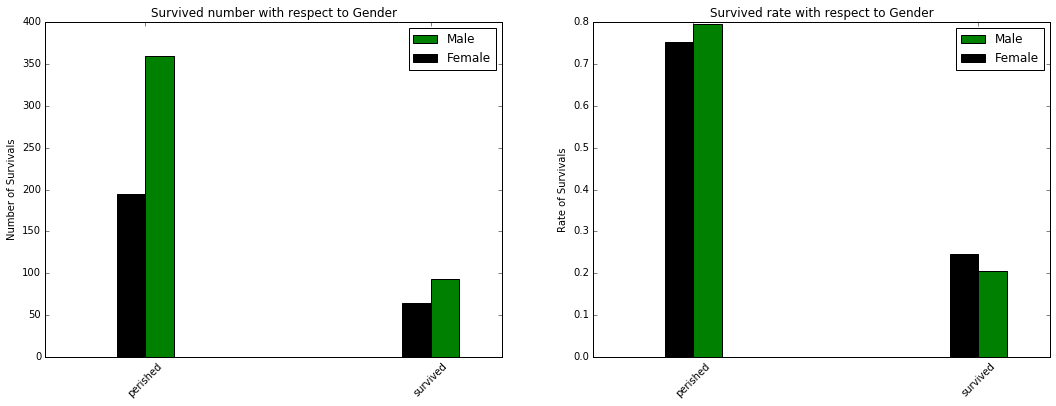

In [17]:
fig = plt.figure(figsize=(18,6))

# create a plot of two subsets, male and female, of the survived variable.
# After we do that we call value_counts() so it can be easily plotted as a bar graph. 
# 'barh' is just a horizontal bar graph
ax1 = fig.add_subplot(121)

df.Survived[df.Sex == 'male'].value_counts().plot(position=0, width= 0.1,kind='bar',color = 'green',label='Male')
df.Survived[df.Sex == 'female'].value_counts().plot(position=1.0, width= 0.1,kind='bar', color='black',label='Female')

plt.title("Survived number with respect to Gender");plt.legend(loc='best')

table = pd.pivot_table(df, index=['Sex'],values ='Survived', aggfunc=[np.sum,len])
plt.ylabel('Number of Survivals')

ax1.set_xticklabels(['perished','survived'], rotation=45)


print table


ax1 = fig.add_subplot(122)
(df.Survived[df.Sex == 'male'].value_counts()/float(df.Sex[df.Sex == 'male'].size)).plot(position=0, width= 0.1,kind='bar',color = 'green',label='Male')  
(df.Survived[df.Sex == 'female'].value_counts()/float(df.Sex[df.Sex == 'female'].size)).plot(position=1.0, width= 0.1,kind='bar', color='black',label='Female')
plt.title("Survived rate with respect to Gender"); plt.legend(loc='best')
plt.ylabel('Rate of Survivals')

ax1.set_xticklabels(['perished','survived'], rotation=45)

In Female, there are 233 passengers survived in 314, the survival rate is 74.2%.
In Male, there are 109 passengers survived in 577, the survival rate is 18.9%.

We could see that the survival rate of female passengers is much more than the male.

### Survival rate against class

[0 1]
        sum  len
Pclass          
1       120  184
2        83  173
3        85  355


[<matplotlib.text.Text at 0x110baead0>, <matplotlib.text.Text at 0x10f7d0590>]

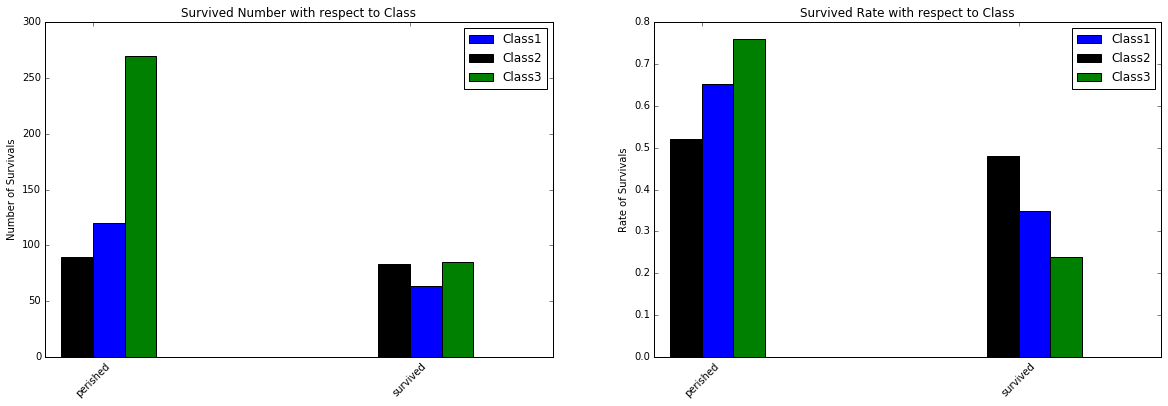

In [24]:
fig = plt.figure(figsize=(20,6))
N = 2
ind = np.arange(N) 
print ind
# create a plot of two subsets, male and female, of the survived variable.
# After we do that we call value_counts() so it can be easily plotted as a bar graph. 
# 'barh' is just a horizontal bar graph
ax1 = fig.add_subplot(121)
width = 0.35

df.Survived[df.Pclass == 1].value_counts().plot(position=0, kind='bar',width=0.1,label='Class1')
df.Survived[df.Pclass == 2].value_counts().plot(position=1, kind='bar',width=0.1, color='black',label='Class2')
df.Survived[df.Pclass == 3].value_counts().plot(position=-1.0, kind='bar',width=0.1, color='green',label='Class3')
plt.title("Survived Number with respect to Class");
plt.legend(loc='best')
plt.ylabel('Number of Survivals')

ax1.set_xticklabels(['perished','survived'], rotation=45)
table = pd.pivot_table(df, index=['Pclass'],values ='Survived', aggfunc=[np.sum,len])



print table
table

ax1 = fig.add_subplot(122)
(df.Survived[df.Pclass == 1].value_counts()/df.Pclass[df.Pclass == 1].size).plot(position=0,kind='bar',width=0.1,label='Class1')
(df.Survived[df.Pclass == 2].value_counts()/df.Pclass[df.Pclass == 2].size).plot(position=1.0,kind='bar', width=0.1,color='black',label='Class2')
(df.Survived[df.Pclass == 3].value_counts()/df.Pclass[df.Pclass == 3].size).plot(position=-1.0,kind='bar', width=0.1,color='green',label='Class3')
plt.title("Survived Rate with respect to Class");
plt.legend(loc='best')
plt.ylabel('Rate of Survivals')

ax1.set_xticklabels(['perished','survived'], rotation=45)

#table1 = d.pivot_table(df, index=['Pclass'],values ='Survived', aggfunc=np.len)

#df.Survived[df.Pclass == 1].value_counts()/df.Pclass[df.Pclass == 1].size
#df.Survived[df.Pclass == 3].value_counts()/df.Pclass[df.Pclass == 3].size


In class 1, there are 136 passengers survived in 216, the survival rate is 37.0%.
In class 2, there are 87 passengers survived in 184, the survival rate is 47.2%.
In class 3, there are 119 passengers survived in 491, the survival rate is 24.2%.

We could see thta more people died in 3rd class as compared to 1st and 2nd class. However, the highest survival rate was in second class (50%) than 1st and 3rd class.

### Survival rate against age

0    247
1    164
Name: Survived, dtype: int64
0    177
1    124
Name: Survived, dtype: int64
0    0.600973
1    0.399027
Name: Survived, dtype: float64
0    0.58804
1    0.41196
Name: Survived, dtype: float64


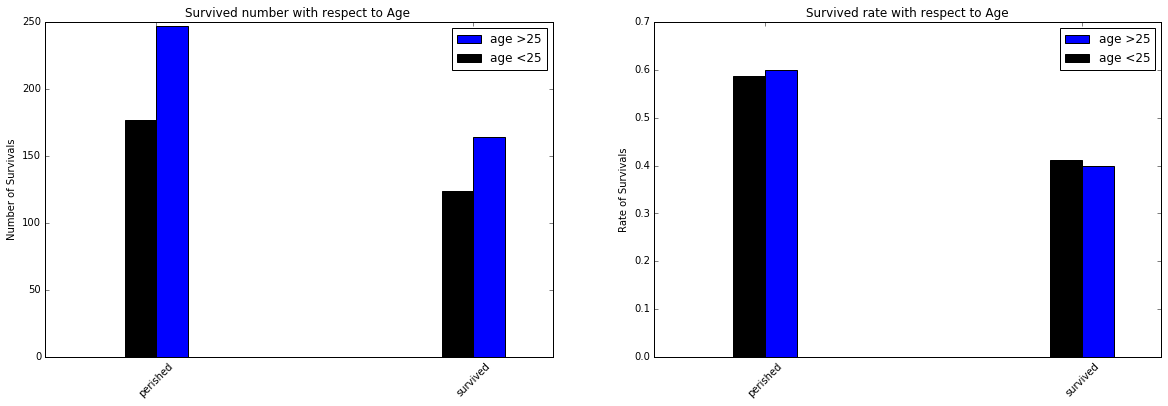

In [25]:
fig = plt.figure(figsize=(20,6))

ax1 = fig.add_subplot(121)
df.Survived[df.Age > 25].value_counts().plot(position=0, width= 0.1, kind='bar',label='age >25')
df.Survived[df.Age <= 25].value_counts().plot(position=1.0, width= 0.1,kind='bar', color='black',label='age <25')
plt.title("Survived number with respect to Age ");
plt.legend(loc='best')
plt.ylabel('Number of Survivals')

ax1.set_xticklabels(['perished','survived'], rotation=45)
print df.Survived[df.Age > 25].value_counts()
print df.Survived[df.Age <= 25].value_counts()


ax1 = fig.add_subplot(122)
(df.Survived[df.Age > 25].value_counts()/df.Survived[df.Age > 25].size).plot(position=0, width= 0.1,kind='bar',label='age >25')
(df.Survived[df.Age <= 25].value_counts()/df.Survived[df.Age <= 25].size).plot(position=1.0, width= 0.1,kind='bar', color='black',label='age <25')
plt.title("Survived rate with respect to Age");
plt.legend(loc='best')
plt.ylabel('Rate of Survivals')

ax1.set_xticklabels(['perished','survived'], rotation=45)

print df.Survived[df.Age > 25].value_counts()/df.Survived[df.Age > 25].size
print df.Survived[df.Age <= 25].value_counts()/df.Survived[df.Age <= 25].size

In people older than 25, there are 247 passengers survived  and 166 died, the survival rate is 40.2%.
In people younger than or equal to 25, there are 124 passengers survived and 177 died, the survival rate is 41.2%.

Survival rate of people under the age of 25 is more than people over the age of 25

# Reflection
I explore the relationship between survival rate against gender, class and age. I could to plot the statistics of the actual survival and died number and the percentage since it will better visualize the relationship between factors and survival rate. My main observations is as below:

1.We could see that the survival rate of female passengers is much more than the male.
2.We could see thta more people died in 3rd class as compared to 1st and 2nd class. However, the highest survival rate was in second class (50%) than 1st and 3rd class.
3.Survival rate of people under the age of 25 is more than people over the age of 25


# Limitations and Shortcomings
The limitation of the analysis is that I did not use the correlation analysis to investigate the relationship between the factors themselves other than the relationship between the factors and the survival rate.

Some factors might be highly correlated with other factors.
